<a href="https://colab.research.google.com/github/kloshak/analysis_consumer_complaints/blob/master/Analysis_Consumer_Complaints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Background**

![alt text](https://www.creditcards.com/credit-card-news/wp-content/uploads/cfpb-anti-regulation-push-in-dc-lg.png)

The **Consumer Financial Protection Bureau (CFPB)** is an agency of the United States government responsible for consumer protection in the financial sector.<br><br>

The CFPB has a core mission that drives its activities: “ensure… that markets for consumer financial products and services are fair, transparent, and competitive”. The financial transactions which are its primary concerns are consumer mortgages, personal loans and credit (covering student loans, credit cards, payday lenders and other small credit suppliers). <br><br>

The financial institutions under the Bureau’s jurisdiction include banks and credit unions with total assets over $10 billion, mortgage lenders,  and any other consumer financial entity the CFPB considers important within consumer financial services

![alt text](https://45xu9e1c732l3adqw1hc3k11-wpengine.netdna-ssl.com/wp-content/uploads/2013/05/CFPB-OSA-Complaint-Flow-768x1024.png)

# **Import pandas**

In [0]:
#Import pandas

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Change plotting colors
plt.style.use('ggplot')

print('import successful')

import successful


# **Import data**

In [0]:
#Import dataset
from google.colab import drive
drive.mount('/content/gdrive/')

complaints_orig = pd.read_csv('/content/gdrive/My Drive/Python122_Katie_Loshak/consumer_complaints.csv')
complaints = complaints_orig.copy()

#View a sample of the raw data
complaints.head(5)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


# **Problem statement**
This project analyzes US Consumer Finance Complaints from 2011 - 2016 to determine trends in complaint volumes over time.

**What questions do we have?**

I hypothesize that there are trends in US Consumer Finance Complaints. The questions I want to answer are:

*   How have the volume of US Consumer Finance Complaints increased or decreased overtime?
*   Which months of the year experience highest volumes of US Consumer Finance Complaints? Which experience the least?
*   What types of financial products experienced the greatest volume of US Consumer Finance Complaints?


These questions will be explored in the sections that follow.<br><br>




**Data dictionary**<br>
"product": Financial product/service, source of complaint

"date_received": Date the financial complaint was received by the SEC

"Year": Year the financial complaint was received by the SEC

"Month": Month the financial complaint was received by the SEC

# **Clean data**

**Null values**

In [0]:
#Confirm which fields have null values. Our focus is on the two key variables we will use: date_received and product.
complaints.isnull().sum()

date_received                        0
product                              0
sub_product                     158322
issue                                0
sub_issue                       343335
consumer_complaint_narrative    489151
company_public_response         470833
company                              0
state                             4887
zipcode                           4505
tags                            477998
consumer_consent_provided       432499
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
complaint_id                         0
dtype: int64

**Result**: 8 out of 18 variables have null values, including:
*sub_product, sub-issue, consumer_complaint_narrative, company_public_response, state, zipcode, tags, consumer_consenst_provided*<br>
**Confirmed**: None of our key variables have null values

In [0]:
#Given our only quantitative variable will be "date received", we must understand if it's currently in object or date format.
complaints['date_received']

0         08/30/2013
1         08/30/2013
2         08/30/2013
3         08/30/2013
4         08/30/2013
             ...    
555952    07/01/2014
555953    07/01/2014
555954    07/10/2012
555955    04/14/2015
555956    08/14/2014
Name: date_received, Length: 555957, dtype: object

**Problem**: Date_received is in object format, but we need it to be in date format in order to plot it over time.

In [0]:
#Update the "date received" variable to be in date format. This will allow us to map dates over a period of time.
complaints['date_received'] = pd.to_datetime(complaints['date_received']).dt.strftime("%Y%m%d")
complaints[['date_received']]

,date_received
0,20130830
1,20130830
2,20130830
3,20130830
4,20130830
...,...
555952,20140701
555953,20140701
555954,20120710
555955,20150414


**Solved**: Date is no in the year, month, day format. This format will allow us to sort the data chronologically.<br>
**Sort**: Now we will sort the data chronologically. We use inplace to ensure this sort is maintained going forward.

In [0]:
#Sort the dataset by this value. 
complaints.sort_values(by='date_received', inplace=True, ascending=True)
complaints[['date_received']]

,date_received
441721,20111201
441746,20111201
441739,20111201
441738,20111201
441730,20111201
...,...
529138,20160425
532706,20160425
532411,20160425
524975,20160425


**Problem**: At this point in the data cleaning, we tried to start creating graphs. However, complaint_id, which is the unique ID given to each complaint, was causing the graphs to be skewed given it was another numerical value in this simple dataset. 

In [0]:
#Ensure date_received is the only numerical value in the dataset
complaints['complaint_id'] = complaints['complaint_id'].astype(str)
complaints[['complaint_id']]

,complaint_id
441721,2270
441746,2286
441739,2280
441738,2278
441730,2275
...,...
529138,1893345
532706,1894488
532411,1893417
524975,1894072


**Solved**: Complaint_id is now a string variable instead of int, and so it will no longer impact our graphs.

#**New variables**

In [0]:
#Create the "year" and "month" variables to prepare our time plots.
complaints['Year'] = pd.to_datetime(complaints['date_received']).dt.strftime("%Y")
complaints['Month'] = pd.to_datetime(complaints['date_received']).dt.strftime("%b")

**Confirmed**: We were able to pull year out of the date to create the 'Year' variable for 2011-2016.

In [0]:
complaints['Year'].unique()

array(['2011', '2012', '2013', '2014', '2015', '2016'], dtype=object)

**Confirmed**: We were able to pull month out of the date to create the 'Month' variable for Jan-Dec.

In [0]:
complaints['Month'].unique()

array(['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov'], dtype=object)

**Confirmed**: There are 11 different types of products that US financial service companies had complaints about. Examples include mortgages, various loans, and credit reports.

In [0]:
complaints['product'].nunique()

11

In [0]:
complaints['product'].unique()

array(['Credit card', 'Mortgage', 'Student loan',
       'Bank account or service', 'Consumer Loan', 'Credit reporting',
       'Money transfers', 'Debt collection', 'Payday loan',
       'Other financial service', 'Prepaid card'], dtype=object)

#**Analysis of Complaints**

**1) How have the volume of US Consumer Finance Complaints increased or decreased overtime?**

*TABLE*



In [0]:
complaints['Year'].value_counts().sort_index()

2011      2549
2012     72523
2013    108273
2014    153138
2015    168621
2016     50853
Name: Year, dtype: int64

*LINE GRAPH*

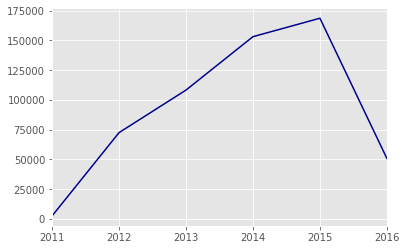

In [0]:
complaints['Year'].value_counts().sort_index().plot(color='darkblue')
# ax.plot(complaints['Year'].sort_values(ascending=True, complaints['Year'].sort_values(ascending=True).value_counts());

**Conclusion**: US consumer finance complaints have increased over the past decade, with a peak in **2015**.<br>
**Note**: This dataset extends from November 2011 through April 2016. Therefore, **only 1/3 of the 2016 complaints** are factored into this data (only four of the 12 months of the year)<br>
**Question**: Can we assume that we can multiply the ~5,000 2016 complaints by 3 to estimate the total 2016 complaints? If we could, it would interestingly enough be the first year that the volume of complaints dropped (from ~17k to ~15k).<br>
**However**: In order to know this, it would be helpful to know if the beginning months of the year have the greatest volumes, smallest volumes, or are somewhere in the middle.

**2) Which months of the year experience highest volumes of US Consumer Finance Complaints? Which experience the least?**

*TABLE*

In [0]:
complaints['Month'].value_counts()

Mar    59409
Jan    52113
Feb    51719
Apr    48986
Aug    45439
Jul    45403
Oct    43804
Jun    42967
Dec    42863
Sep    41948
May    41680
Nov    39626
Name: Month, dtype: int64

*BAR GRAPH*

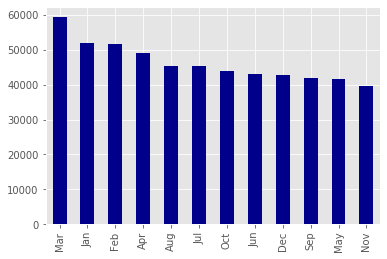

In [0]:
complaints['Month'].value_counts().plot(kind='bar', color='darkblue')

**Initial conclusion**: The highest volume of US Consumer Finance complaints occur in **March** of each year, on average. Following March for the greatest volumes are January, February, and April, which are the other three months witin the first third of the year. The lowest volumes of complaints occurred in November, May, September, and December, which are mostly in the second half of the year.<br>
**Therefore**: We can assume that if we were to multiply the ~5k complaints from the first four months of 2016 by 3 to represent the full year, it could actually be the *maximum possible estimate*.<br>
**Final conclusion**: We can insinuiate that US Consumer Finance complaints did go down in 2016 as compared to 2015, which would be the first drop in five years.

**3) What types of financial products experienced the greatest volume of US Consumer Finance Complaints?**

*TABLE*

In [0]:
complaints['product'].value_counts()

Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Consumer Loan               20990
Student loan                15839
Payday loan                  3877
Money transfers              3812
Prepaid card                 2470
Other financial service       557
Name: product, dtype: int64

*BAR GRAPH*

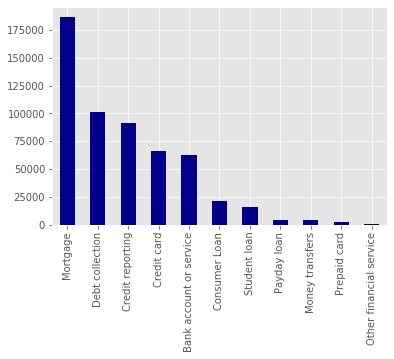

In [0]:
complaints['product'].value_counts().plot(kind='bar', color='darkblue')

In [0]:
#Calculate percentage of complaints that were related to mortgage products.
round((186475 / 555957)*100)

34

**Initial conclusion**: Mortgages were the topic of over 1/3 US Consumer Finance Complaints between 2011-2016.<br>
**Updated, informed conclusion**: The dataset we are using was updated, upgraded, and added to overtime. In March 2013, the Consumer Financial Protection Bureau added mortgage complaints dating back to December 1, 2011, along with bank account and service complaints, student loan complaints, vehicle and other consumer loan
complaints, all dating back to March 1, 2012. It is possible that this value is skewed given those 4 additional months.

#**Final conclusions**


1.   US Consumer Financial Complaints have in fact increased over the period of 2011-2015, with its peak in 2015, and with its first drop in 2016.
2.   Most complaints are experienced in the beginning of the year, and fewer occur closer to the end of the year.
3.   We need additional research to confirm whether most complaints were in fact about mortgages for the time period 2011-2016. It is possible that the data is skewed.



#**Appendix**

**Greatest volume of complaints by company**

In [0]:
complaints['company'].value_counts()

Bank of America                             55998
Wells Fargo & Company                       42024
JPMorgan Chase & Co.                        33881
Equifax                                     31828
Experian                                    30905
                                            ...  
Check First Inc                                 1
Dynamic Dedicated Financial Partnerships        1
Cawthorn, Deskevich & Gavin, P.c.               1
Fink & McGregor Mortgage, LC                    1
Delmar Financial Company                        1
Name: company, Length: 3605, dtype: int64

**Greatest volume of complaints by state**

In [0]:
complaints['state'].value_counts()

CA    81700
FL    53673
TX    41352
NY    38266
GA    24548
      ...  
MH       27
MP       19
AS       17
AA        9
PW        9
Name: state, Length: 62, dtype: int64